Deep Learning Model for only the Wednesday Dataset.

Epoch 1/100
7566/7566 [==============================] - 48s 6ms/step - loss: 0.0814 - accuracy: 0.9760 - val_loss: 0.0340 - val_accuracy: 0.9914
Epoch 2/100
7566/7566 [==============================] - 48s 6ms/step - loss: 0.0236 - accuracy: 0.9936 - val_loss: 0.0161 - val_accuracy: 0.9961
Epoch 3/100
7566/7566 [==============================] - 47s 6ms/step - loss: 0.0176 - accuracy: 0.9958 - val_loss: 0.0142 - val_accuracy: 0.9961
Epoch 4/100
7566/7566 [==============================] - 43s 6ms/step - loss: 0.0155 - accuracy: 0.9962 - val_loss: 0.0154 - val_accuracy: 0.9964
Epoch 5/100
7566/7566 [==============================] - 41s 5ms/step - loss: 0.0145 - accuracy: 0.9964 - val_loss: 0.0130 - val_accuracy: 0.9967
Epoch 6/100
7566/7566 [==============================] - 46s 6ms/step - loss: 0.0138 - accuracy: 0.9965 - val_loss: 0.0123 - val_accuracy: 0.9968
Epoch 7/100
7566/7566 [==============================] - 40s 5ms/step - loss: 0.0129 - accuracy: 0.9966 - val_loss: 0.0142 -

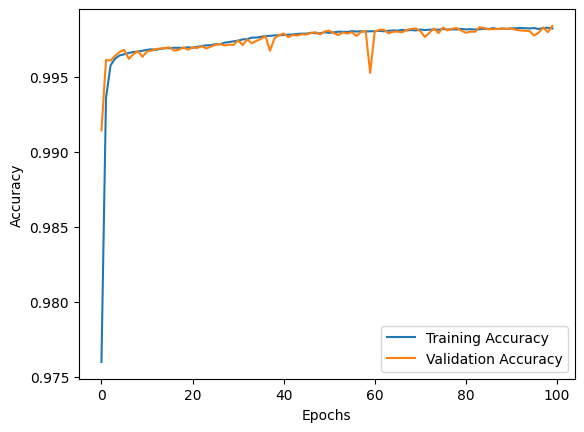

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report

# Load and preprocess the data (assuming you have already loaded it)
# Load the data into memory
data = pd.read_csv('/content/drive/MyDrive/CSEC 620 Cyberanalytics and Machine Learning/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv')
# dataframe2 = pd.read_csv('/content/drive/MyDrive/CSEC 620 Cyberanalytics and Machine Learning/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
# dataframe3 = pd.read_csv('/content/drive/MyDrive/CSEC 620 Cyberanalytics and Machine Learning/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
# dataframe4 = pd.read_csv('/content/drive/MyDrive/CSEC 620 Cyberanalytics and Machine Learning/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv')
# dataframe5 = pd.read_csv('/content/drive/MyDrive/CSEC 620 Cyberanalytics and Machine Learning/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv')
# dataframe6 = pd.read_csv('/content/drive/MyDrive/CSEC 620 Cyberanalytics and Machine Learning/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
# dataframe7 = pd.read_csv('/content/drive/MyDrive/CSEC 620 Cyberanalytics and Machine Learning/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
# dataframe8 = pd.read_csv('/content/drive/MyDrive/CSEC 620 Cyberanalytics and Machine Learning/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv')

# data = pd.concat([dataframe1, dataframe2, dataframe3, dataframe4, dataframe5, dataframe6, dataframe7, dataframe8])

# Encode the ' Label' column
label_encoder = LabelEncoder()
data[' Label'] = label_encoder.fit_transform(data[' Label'])

# Drop rows with missing values
data = data.dropna()

# Split the data into features (X) and labels (Y)
X = data.drop(columns=[' Label'])  # Features
Y = data[' Label']  # Labels

# Handle infinite values by replacing them with a large finite value
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(1e9, inplace=True)  # Replace NaN (resulting from infinite values) with a large finite value

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Define the deep learning model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer

    # Hidden layers
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),

    # Output layer
    layers.Dense(6, activation='softmax')  # 15 classes for 15 types of attacks
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define custom callback for tracking metrics during training
class MetricsCallback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.all_val_predictions = []

    def on_epoch_end(self, epoch, logs=None):
        # Calculate predictions on the validation set
        val_predictions = np.argmax(self.model.predict(X_test), axis=-1)
        self.all_val_predictions.append(val_predictions)

# Create the metrics callback instance
metrics_callback = MetricsCallback()

# Train the model with the custom callback
history = model.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=(X_test, Y_test), callbacks=[metrics_callback])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Get the model's predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Print the classification report
report = classification_report(Y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

# Plot training history (optional)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Deep Learning Model for the entire dataset.

Epoch 1/100
30947/30947 [==============================] - 213s 7ms/step - loss: 0.0896 - accuracy: 0.9665 - val_loss: 0.0536 - val_accuracy: 0.9788
Epoch 2/100
30947/30947 [==============================] - 177s 6ms/step - loss: 0.0500 - accuracy: 0.9784 - val_loss: 0.0461 - val_accuracy: 0.9814
Epoch 3/100
30947/30947 [==============================] - 195s 6ms/step - loss: 0.0442 - accuracy: 0.9809 - val_loss: 0.0402 - val_accuracy: 0.9833
Epoch 4/100
30947/30947 [==============================] - 194s 6ms/step - loss: 0.0416 - accuracy: 0.9821 - val_loss: 0.0407 - val_accuracy: 0.9826
Epoch 5/100
30947/30947 [==============================] - 215s 7ms/step - loss: 0.0402 - accuracy: 0.9831 - val_loss: 0.0376 - val_accuracy: 0.9844
Epoch 6/100
30947/30947 [==============================] - 192s 6ms/step - loss: 0.0391 - accuracy: 0.9836 - val_loss: 0.0381 - val_accuracy: 0.9827
Epoch 7/100
30947/30947 [==============================] - 189s 6ms/step - loss: 0.0384 - accuracy: 0.9842

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    682139
                       Bot       0.56      0.60      0.58       588
                      DDoS       1.00      1.00      1.00     38313
             DoS GoldenEye       0.99      0.98      0.99      3073
                  DoS Hulk       0.98      0.99      0.99     69005
          DoS Slowhttptest       0.98      0.97      0.98      1689
             DoS slowloris       0.99      0.98      0.98      1648
               FTP-Patator       1.00      1.00      1.00      2390
                Heartbleed       1.00      1.00      1.00         2
              Infiltration       0.00      0.00      0.00         6
                  PortScan       0.99      1.00      0.99     47559
               SSH-Patator       0.94      0.98      0.96      1737
  Web Attack � Brute Force       0.59      0.14      0.23       457
Web Attack � Sql Injecti

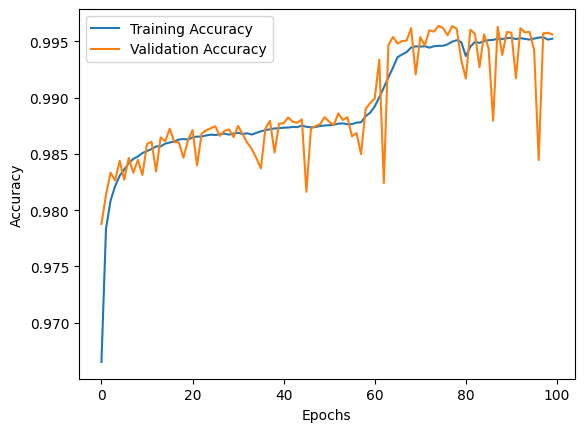

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report

# Load and preprocess the data (assuming you have already loaded it)
# Load the data into memory
dataframe1 = pd.read_csv('/content/drive/MyDrive/CSEC 620 Cyberanalytics and Machine Learning/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv')
dataframe2 = pd.read_csv('/content/drive/MyDrive/CSEC 620 Cyberanalytics and Machine Learning/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
dataframe3 = pd.read_csv('/content/drive/MyDrive/CSEC 620 Cyberanalytics and Machine Learning/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
dataframe4 = pd.read_csv('/content/drive/MyDrive/CSEC 620 Cyberanalytics and Machine Learning/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv')
dataframe5 = pd.read_csv('/content/drive/MyDrive/CSEC 620 Cyberanalytics and Machine Learning/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv')
dataframe6 = pd.read_csv('/content/drive/MyDrive/CSEC 620 Cyberanalytics and Machine Learning/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
dataframe7 = pd.read_csv('/content/drive/MyDrive/CSEC 620 Cyberanalytics and Machine Learning/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
dataframe8 = pd.read_csv('/content/drive/MyDrive/CSEC 620 Cyberanalytics and Machine Learning/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv')

data = pd.concat([dataframe1, dataframe2, dataframe3, dataframe4, dataframe5, dataframe6, dataframe7, dataframe8])

# Encode the ' Label' column
label_encoder = LabelEncoder()
data[' Label'] = label_encoder.fit_transform(data[' Label'])

# Drop rows with missing values
data = data.dropna()

# Split the data into features (X) and labels (Y)
X = data.drop(columns=[' Label'])  # Features
Y = data[' Label']  # Labels

# Handle infinite values by replacing them with a large finite value
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(1e9, inplace=True)  # Replace NaN (resulting from infinite values) with a large finite value

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Define the deep learning model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer

    # Hidden layers
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),

    # Output layer
    layers.Dense(15, activation='softmax')  # 15 classes for 15 types of attacks
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define custom callback for tracking metrics during training
class MetricsCallback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.all_val_predictions = []

    def on_epoch_end(self, epoch, logs=None):
        # Calculate predictions on the validation set
        val_predictions = np.argmax(self.model.predict(X_test), axis=-1)
        self.all_val_predictions.append(val_predictions)

# Create the metrics callback instance
metrics_callback = MetricsCallback()

# Train the model with the custom callback
history = model.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=(X_test, Y_test), callbacks=[metrics_callback])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Get the model's predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Print the classification report
report = classification_report(Y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

# Plot training history (optional)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
